# SPheroidal Light Trapping Photovoltaics

This notebook is dedicated to the analysis of data acquired during my Bachelor's dissertation at IST titled "Optical Optimization of Nanopatterned Perovskite Solar Cells". You can find the full repository here: [GitHub – sp-lt-pv](https://github.com/e4m8ch/sp-lt-pv).

This work was based on:

> Haque, S., Alexandre, M., Baretzky, C., Rossi, D., De Rossi, F., Vicente, A. T., Brunetti, F., Águas, H., Ferreira, R. A. S., Fortunato, E., Auf der Maur, M., Würfel, U., Martins, R., & Mendes, M. J. (2022). *Photonic-structured perovskite solar cells: Detailed optoelectronic analysis*. **ACS Photonics, 9**(7), 2408–2421. [https://doi.org/10.1021/acsphotonics.2c00446](https://doi.org/10.1021/acsphotonics.2c00446)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the data file. Current path is the default for this repository
path = "../docs/RAW_DATA.xlsx"

# Absorption Data

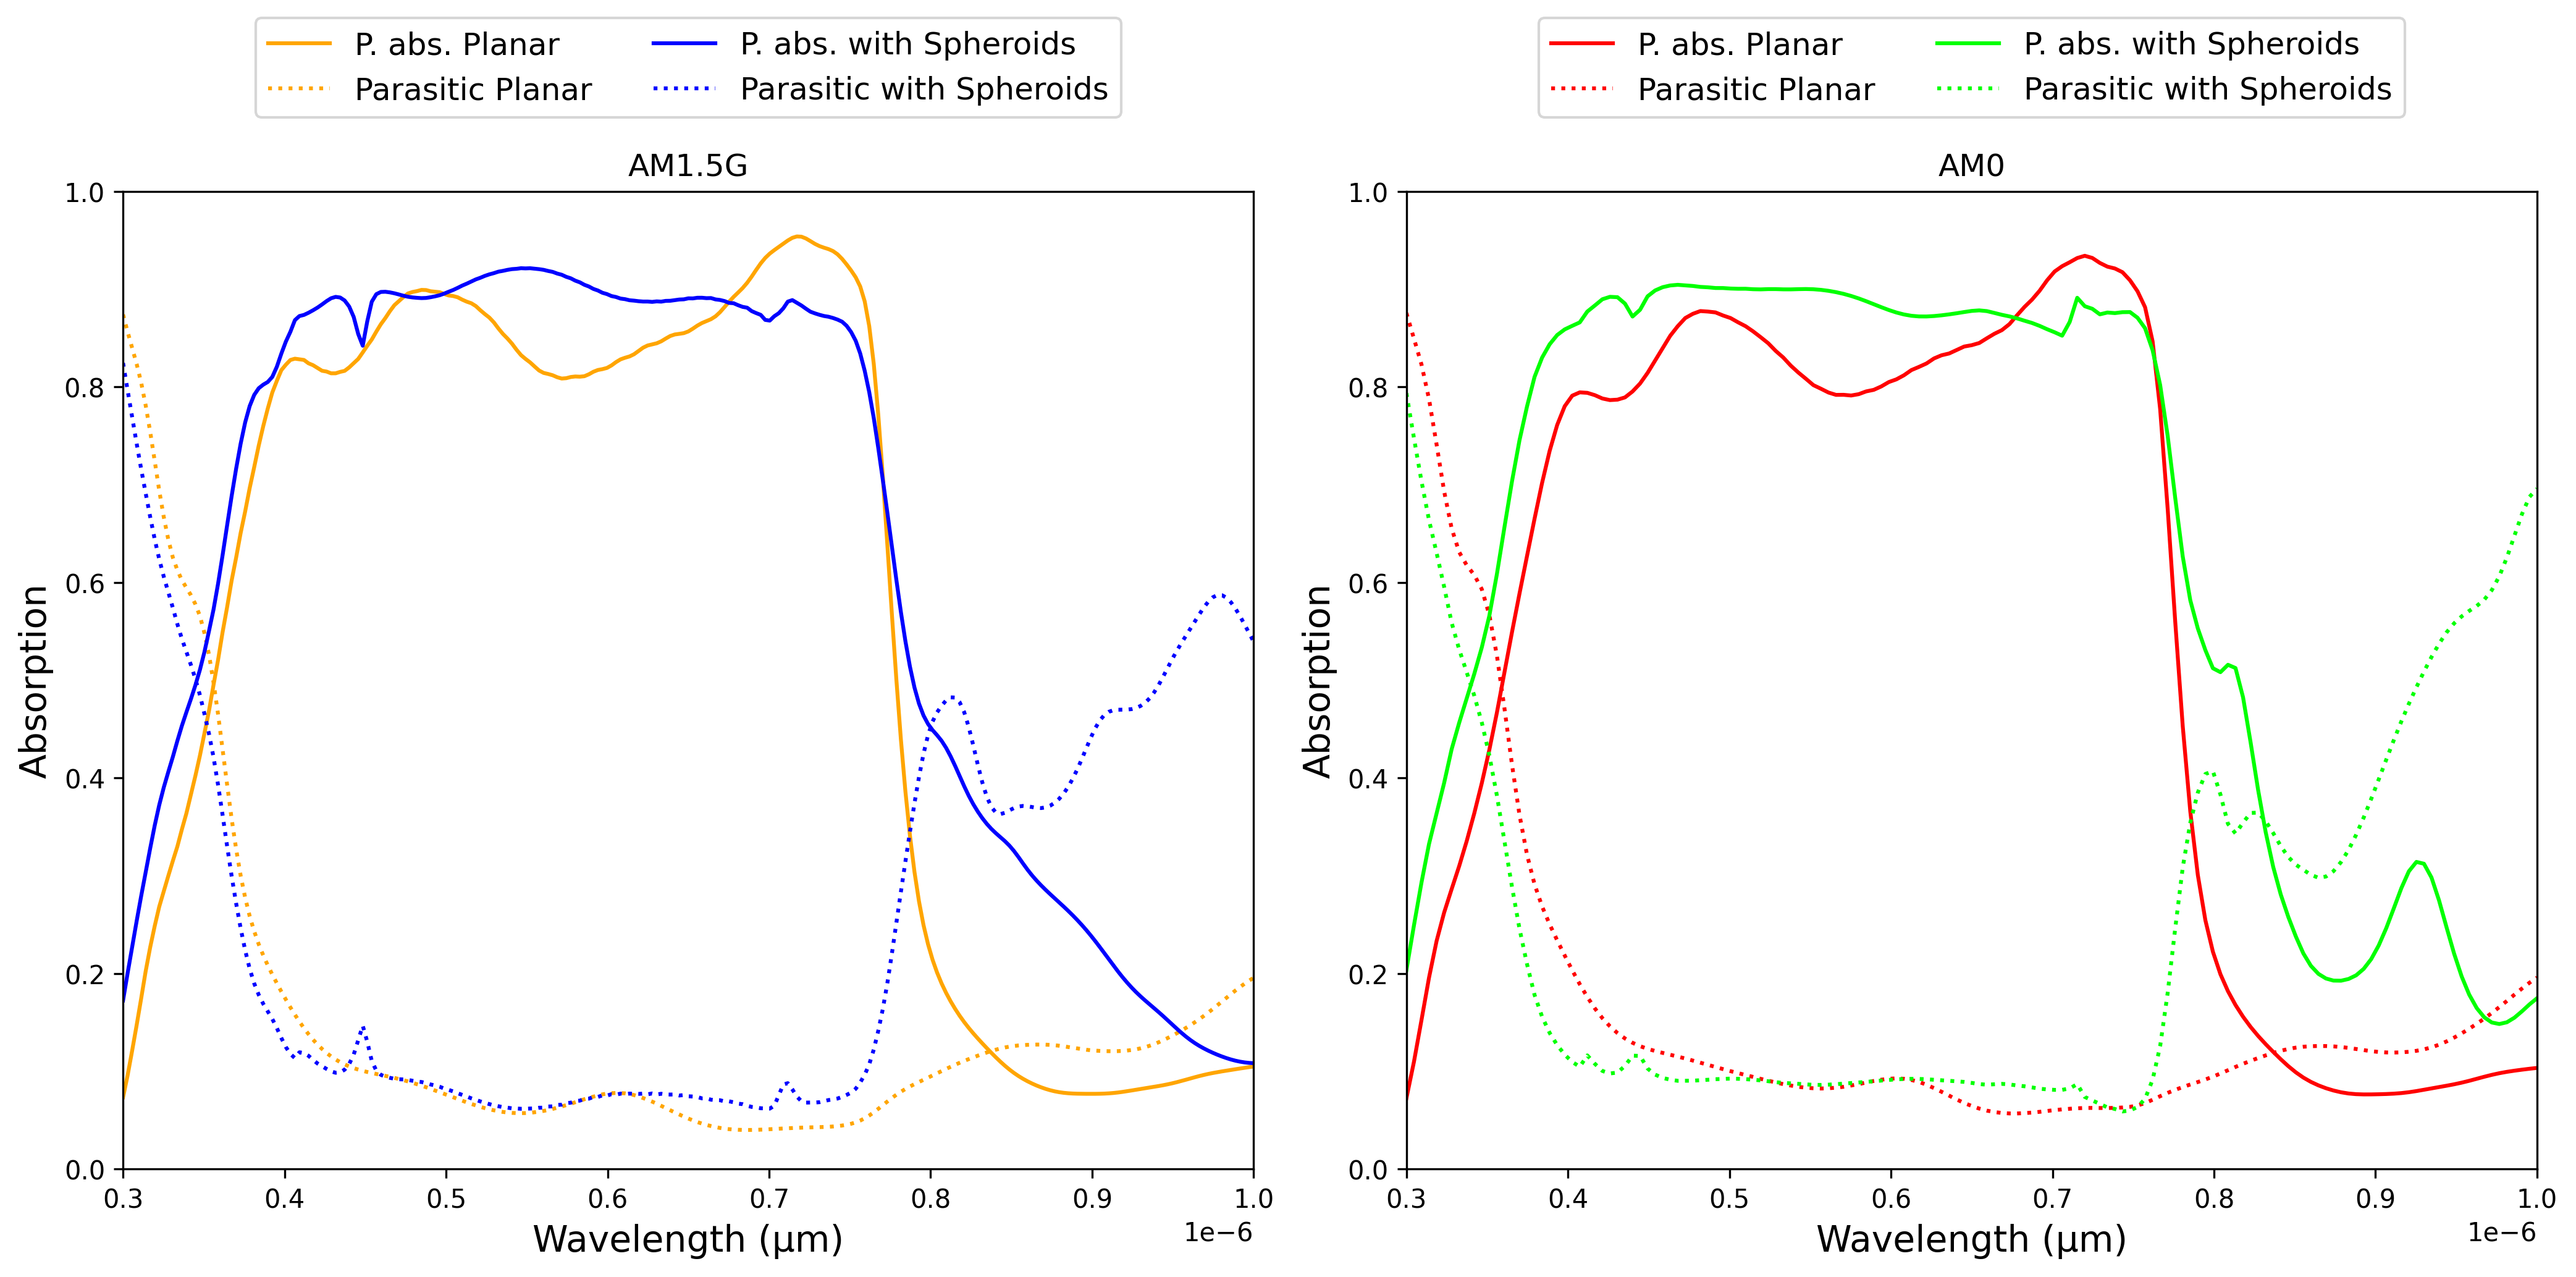

In [2]:
# Create dataframe with the first sheet of the .xlsx file, corresponding to the absorption data
df_abs = pd.read_excel(path, sheet_name="Absorption")

# Copy the part of the dataframe that refers to AM1.5 to a different dataframe, and remove AM15 from the column names
df_abs_am15 = df_abs.filter(like="AM15").copy()
df_abs_am15.columns = df_abs_am15.columns.str.replace("AM15", "", regex=False)
df_abs_am15.columns = df_abs_am15.columns.str.replace("_X", "Wavelength", regex=False)
df_abs_am15.columns = df_abs_am15.columns.str.replace("_Y", "", regex=False)

# Copy the part of the dataframe that refers to AM0 to a different dataframe, and remove AM0 from the column names
df_abs_am0 = df_abs.filter(like="AM0").copy()
# Drop missing values, since AM0 has less wavelength points
df_abs_am0.dropna(axis=0, inplace=True)
df_abs_am0.columns = df_abs_am0.columns.str.replace("AM0", "", regex=False)
df_abs_am0.columns = df_abs_am0.columns.str.replace("_X", "Wavelength", regex=False)
df_abs_am0.columns = df_abs_am0.columns.str.replace("_Y", "", regex=False)

# Generate parasitic absorption difference data
df_abs_am15['DiffSp'] = df_abs_am15['SpP'] - df_abs_am15['Sp']
df_abs_am15['DiffFlat'] = df_abs_am15['FlatP'] - df_abs_am15['Flat']
df_abs_am0['DiffSp'] = df_abs_am0['SpP'] - df_abs_am0['Sp']
df_abs_am0['DiffFlat'] = df_abs_am0['FlatP'] - df_abs_am0['Flat']

# Plotting the data
# ------------------------------------------------------------------
# Create figure with two plots
fig, (ax15, ax0) = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

# AM1.5
ax15.plot(df_abs_am15['Wavelength'], df_abs_am15['Flat'], label="P. abs. Planar", linestyle='-', color='orange')
ax15.plot(df_abs_am15['Wavelength'], df_abs_am15['DiffFlat'], label="Parasitic Planar", linestyle=':', color='orange')
ax15.plot(df_abs_am15['Wavelength'], df_abs_am15['Sp'], label="P. abs. with Spheroids", linestyle='-', color='blue')
ax15.plot(df_abs_am15['Wavelength'], df_abs_am15['DiffSp'], label="Parasitic with Spheroids", linestyle=':', color='blue')

ax15.set_xlabel("Wavelength (µm)", fontsize=14)
ax15.set_ylabel("Absorption", fontsize=14)
ax15.set_xlim(df_abs_am15['Wavelength'].iloc[0], df_abs_am15['Wavelength'].iloc[-1])
ax15.set_ylim(0, 1)

ax15.legend(loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=2, fontsize=12)
ax15.grid(False)
ax15.set_title("AM1.5G")

# AM0
ax0.plot(df_abs_am0['Wavelength'], df_abs_am0['Flat'], label="P. abs. Planar", linestyle='-', color='red')
ax0.plot(df_abs_am0['Wavelength'], df_abs_am0['DiffFlat'], label="Parasitic Planar", linestyle=':', color='red')
ax0.plot(df_abs_am0['Wavelength'], df_abs_am0['Sp'], label="P. abs. with Spheroids", linestyle='-', color='lime')
ax0.plot(df_abs_am0['Wavelength'], df_abs_am0['DiffSp'], label="Parasitic with Spheroids", linestyle=':', color='lime')

ax0.set_xlabel("Wavelength (µm)", fontsize=14)
ax0.set_ylabel("Absorption", fontsize=14)
ax0.set_xlim(df_abs_am0['Wavelength'].iloc[0], df_abs_am0['Wavelength'].iloc[-1])
ax0.set_ylim(0, 1)

ax0.legend(loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=2, fontsize=12)
ax0.grid(False)
ax0.set_title("AM0")

plt.tight_layout()
plt.show()



# Convergence Testing

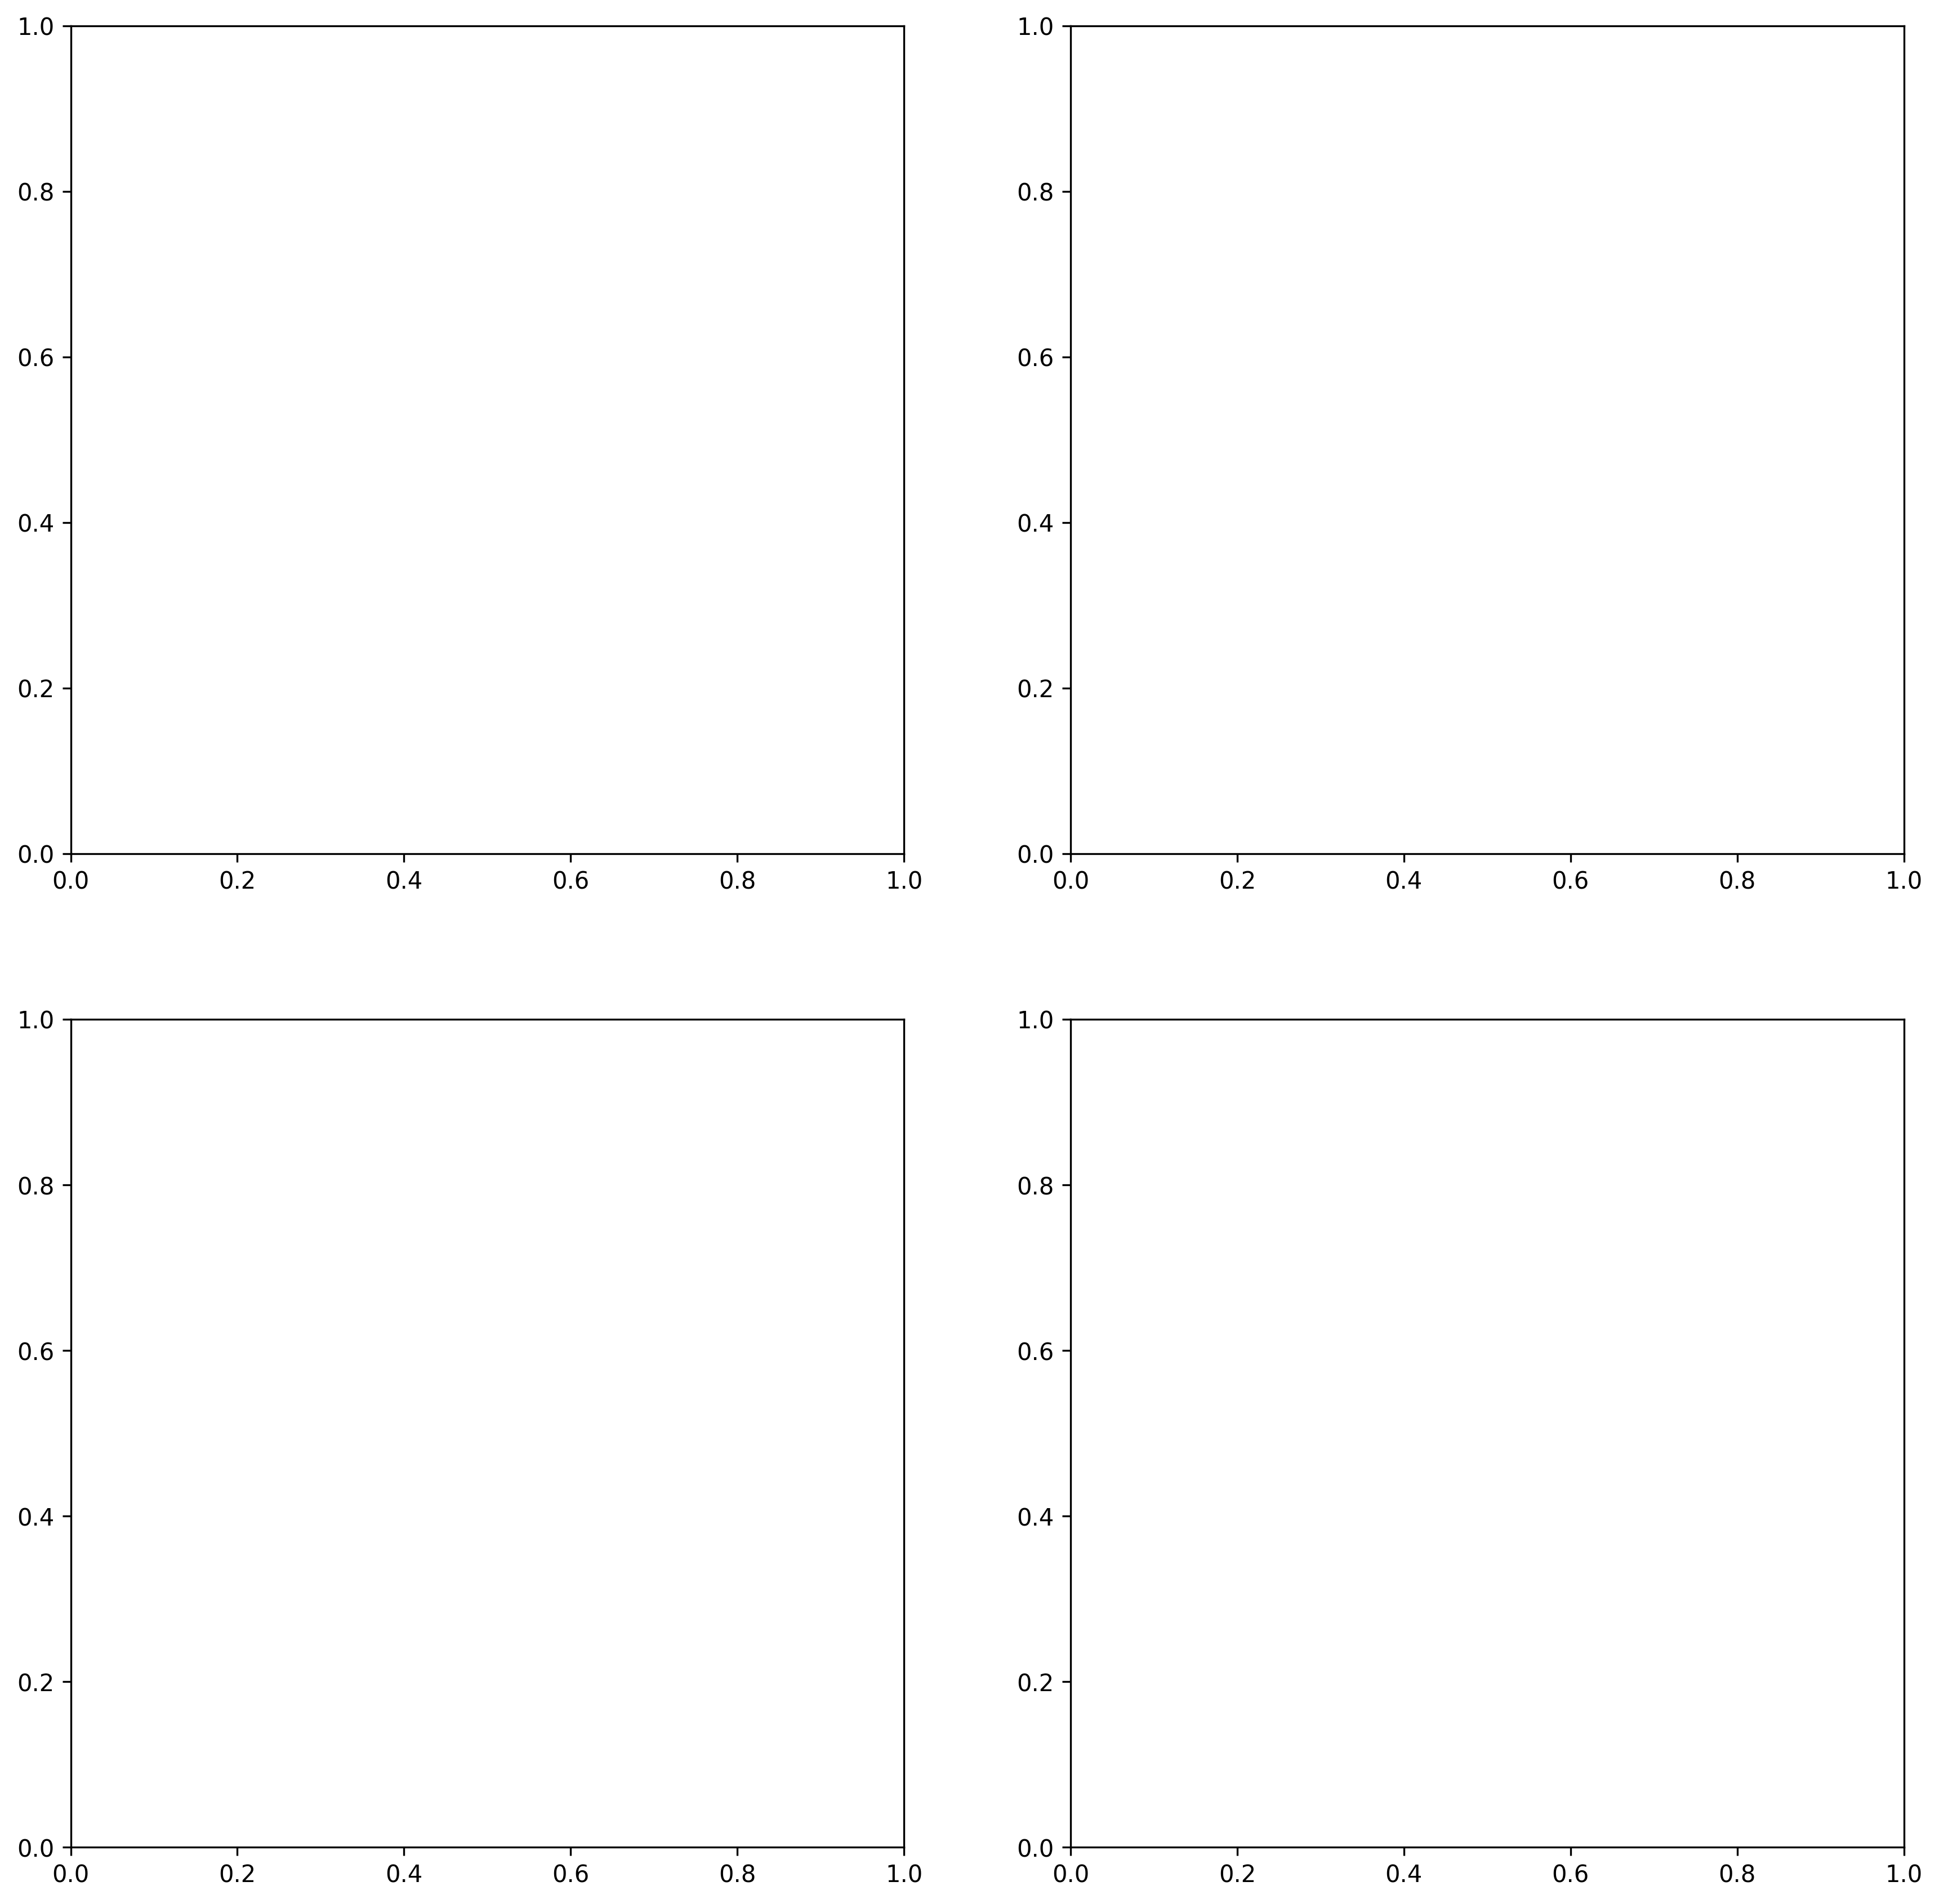

In [8]:
# Create dataframe with the convergence data
df_con = pd.read_excel(path, sheet_name="Convergence")

# Data cleanup

df_global_mesh = df_con.filter(like="GlobalMesh").copy()
df_global_mesh.dropna(axis=0, inplace=True)
df_global_mesh.columns = df_global_mesh.columns.str.replace("GlobalMesh_", "", regex=False)
df_global_mesh.columns = df_global_mesh.columns.str.replace("Y", "Jph", regex=False)

df_PML = df_con.filter(like="PML").copy()
df_PML.columns = df_PML.columns.str.replace("PML_", "", regex=False)
df_PML.columns = df_PML.columns.str.replace("X", "", regex=False)
df_PML.columns = df_PML.columns.str.replace("Y", "Jph", regex=False)

df_xy_mesh = df_con.filter(like="XYMesh").copy()
df_xy_mesh.dropna(axis=0, inplace=True)
df_xy_mesh.columns = df_xy_mesh.columns.str.replace("XYMesh_", "", regex=False)
df_xy_mesh.columns = df_xy_mesh.columns.str.replace("Y", "Jph", regex=False)

df_z_mesh = df_con.filter(like="ZMesh").copy()
df_z_mesh.dropna(axis=0, inplace=True)
df_z_mesh.columns = df_z_mesh.columns.str.replace("ZMesh_", "", regex=False)
df_z_mesh.columns = df_z_mesh.columns.str.replace("Y", "Jph", regex=False)

# Plotting the data
# ------------------------------------------------------------------

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14), dpi=300)

# Flatten axes (so you can unpack them easily)
gb, pml, xy, z = axes.flatten()



# Polarization

In [4]:
df_pol = pd.read_excel(path, sheet_name="Polarization")

df_pol.head(5)

,AM15Angle,Unnamed: 1,AM15S,Unnamed: 3,AM15P,Unnamed: 5,AM15Dir,Unnamed: 7,AM0Angle,Unnamed: 9,AM0S,Unnamed: 11,AM0P,Unnamed: 13,AM0Dir,Unnamed: 15
0,0,258.166,0.0,258.395,0.0,258.166,0.0,258.166,0,317.136,0.0,318.290,0.0,317.130,0.0,317.618
1,10,258.001,10.0,258.560,10.0,258.001,5.0,260.907,10,316.933,10.0,318.493,10.0,316.926,10.0,311.725
2,20,257.870,20.0,258.692,20.0,257.870,10.0,257.613,20,316.824,20.0,318.602,20.0,316.819,20.0,305.393
3,30,257.788,30.0,258.770,30.0,257.788,15.0,256.321,30,316.824,30.0,318.601,30.0,316.868,30.0,299.152
4,40,257.765,40.0,258.794,40.0,257.765,20.0,257.337,40,316.931,40.0,318.498,40.0,317.003,40.0,253.907


# Parametric Analysis

In [5]:
df_par_geo = pd.read_excel(path, sheet_name="Parametric")
df_par_lay = pd.read_excel(path, sheet_name="Layers")

df_par_lay.head(5)

,AM15Au_X,AM15Au_Y,AM15NiO_X,AM15NiO_Y,AM15ZnO_X,AM15ZnO_Y,AM15ITO_X,AM15ITO_Y,AM0Au_X,AM0Au_Y,AM0NiO_X,AM0NiO_Y,AM0ZnO_X,AM0ZnO_Y,AM0ITO_X,AM0ITO_Y
0,1.600000e-07,267.862,8.000000e-09,267.754,8.000000e-08,270.081,2.800000e-07,271.055,1.600000e-07,313.098,8.000000e-09,315.653,8.000000e-08,319.806,2.800000e-07,319.933
1,1.688890e-07,267.840,8.444440e-09,267.338,8.444440e-08,269.320,2.955560e-07,270.217,1.688890e-07,314.376,8.444440e-09,319.438,8.444440e-08,320.265,2.955560e-07,319.884
2,1.777780e-07,268.164,8.888890e-09,267.322,8.888890e-08,268.596,3.111110e-07,269.414,1.777780e-07,315.495,8.888890e-09,317.730,8.888890e-08,318.390,3.111110e-07,318.550
3,1.866670e-07,268.284,9.333330e-09,267.899,9.333330e-08,269.232,3.266670e-07,268.854,1.866670e-07,316.534,9.333330e-09,319.400,9.333330e-08,318.762,3.266670e-07,318.494
4,1.955560e-07,268.385,9.777780e-09,268.005,9.777780e-08,269.010,3.422220e-07,266.834,1.955560e-07,317.471,9.777780e-09,319.059,9.777780e-08,318.453,3.422220e-07,318.785
